# Step 1: Data Preprocessing

In this step, we'll load the breast cancer dataset and perform data preprocessing tasks. These tasks include:
- Loading the dataset.
- Checking for missing values.
- Scaling the features for better model performance.

We'll be using the `pandas` and `scikit-learn` libraries for these tasks.


In [3]:
#importing libraries, dataset and required tools
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#creating a dataframe by loading the dataset in it and printing the first few values
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Exploring the Data

Let’s take a look at the first few rows of the dataset to understand its structure. We will also check for any missing values.


In [5]:
#printing missing values
missing_values = df.isnull().sum()
print(missing_values)

#printing basic statistics
print(df.describe())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    5

### Data Cleaning

We’ve checked for missing values and reviewed the basic statistics. In this case, wdon't have any missing values in any row or column of the dataset, so nothing needs to be done about it for now.s.

Additionally, we will split the dataset into features (`X`) and target (`y`), and then split it into training and testing sets.


In [7]:
#splitting data into features and targets
X = df.drop(columns=['target'])
y = df['target']

#splitting the data into training and testing sets 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Feature Scaling

Since we’re dealing with features that may have different scales (e.g., one feature could range from 1 to 1000, while another could range from 0 to 1), we scale the features. This ensures that no feature dominates others due to its scale and improves the model's performance.


In [9]:
#scaling the features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 2: Model Training with Random Forest

Now that we've performed the train-test split and feature scaling, it's time to train our model. For this, we will use a Random Forest Classifier, which is an ensemble learning method that builds multiple decision trees and merges their results to improve prediction accuracy.

## Training and making Predictions using the Random Forest modelfier

First, we need to import the necessary Random Forest class from the `sklearn.ensemble` mf needed)


In [28]:
#importing the random forest classifier
from sklearn.ensemble import RandomForestClassifier

#creating the model
model = RandomForestClassifier(n_estimators = 100, random_state = 42)

#fitting the model on the training data
model.fit(X_train, y_train)

#making the predictions
y_pred = model.predict(X_test)

## 2.2 Model Evaluation
- Next, we will evaluate the performance of the trained model using common classification metrics, such as accuracy, precision, recall, F1-score, and confusion matrix. These metrics will give us insights into how well the model is making predictions.

In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

#printing the classification report
print('classification report: ')
print(classification_report(y_test, y_pred))

#printing the confusion matrix
print('confusion matrix: ')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9708
classification report: 
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

confusion matrix: 
[[ 59   4]
 [  1 107]]


# Step 3: Visualizing the model's performance
- After fitting and using the model for making predictions, we evaluated its performance using different evaluation metrics.
- Now we will visualize the evaluation using a HeatMap for the Confusion Matrix and the ROC-AUC curve

## Confusion Matrix Heatmap
This heatmap visualizes the performance of the Random Forest classifier by showing the distribution of true positives, true negatives, false positives, and false negatives.

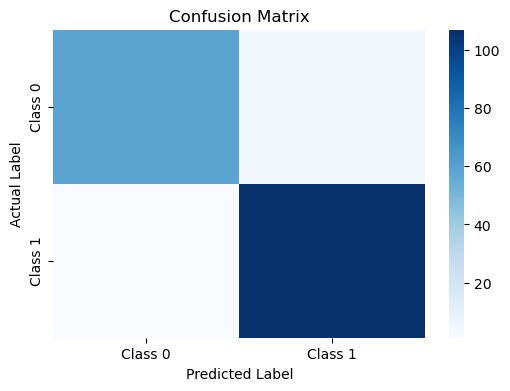

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# generating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# ploting the heatmap for the matrix
plt.figure(figsize = (6, 4))
sns.heatmap(cm, fmt = 'd', cmap = 'Blues', xticklabels = ['Class 0', 'Class 1'], yticklabels = ['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

## ROC-AUC Curve
The ROC curve illustrates the trade-off between the true positive rate (sensitivity) and the false positive rate (1-specificity). The AUC (area under the curve) measures the classifier's ability to distinguish between classes.

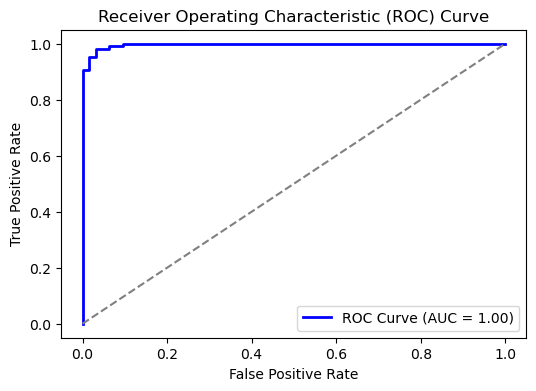

In [47]:
from sklearn.metrics import roc_curve, auc

#calculating probabilities and the ROC Curve
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Ploting the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()